# 1. 非线性激活

① inplace为原地替换，若为True，则变量的值被替换。若为False，则会创建一个新变量，将函数处理后的值赋值给新变量，原始变量的值没有修改。

In [1]:
import torch
from torch import nn
from torch.nn import ReLU

input = torch.tensor([[1,-0.5],
                      [-1,3]])
input = torch.reshape(input,(-1,1,2,2))
print(input.shape)

class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()
        self.relu1 = ReLU()
        
    def forward(self, input):
        output = self.relu1(input)
        return output
    
tudui = Tudui()
output = tudui(input)
print(output)

torch.Size([1, 1, 2, 2])
tensor([[[[1., 0.],
          [0., 3.]]]])


# 2. Tensorboard显示

In [2]:
import torch
import torchvision
from torch import nn 
from torch.nn import ReLU
from torch.nn import Sigmoid
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

dataset = torchvision.datasets.CIFAR10("./dataset",train=False,transform=torchvision.transforms.ToTensor(),download=True)       
dataloader = DataLoader(dataset, batch_size=64)

class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()
        self.relu1 = ReLU()
        self.sigmoid1 = Sigmoid()
        
    def forward(self, input):
        output = self.sigmoid1(input)
        return output

tudui = Tudui()
writer = SummaryWriter("logs")
step = 0

for data in dataloader:
    imgs, targets = data
    writer.add_images("input", imgs, step)
    output = tudui(imgs)
    writer.add_images("output", output, step)
    step = step + 1

Files already downloaded and verified


① 在 Anaconda 终端里面，激活py3.6.3环境，再输入 tensorboard --logdir=C:\Users\wangy\Desktop\03CV\logs 命令，将网址赋值浏览器的网址栏，回车，即可查看tensorboard显示日志情况。

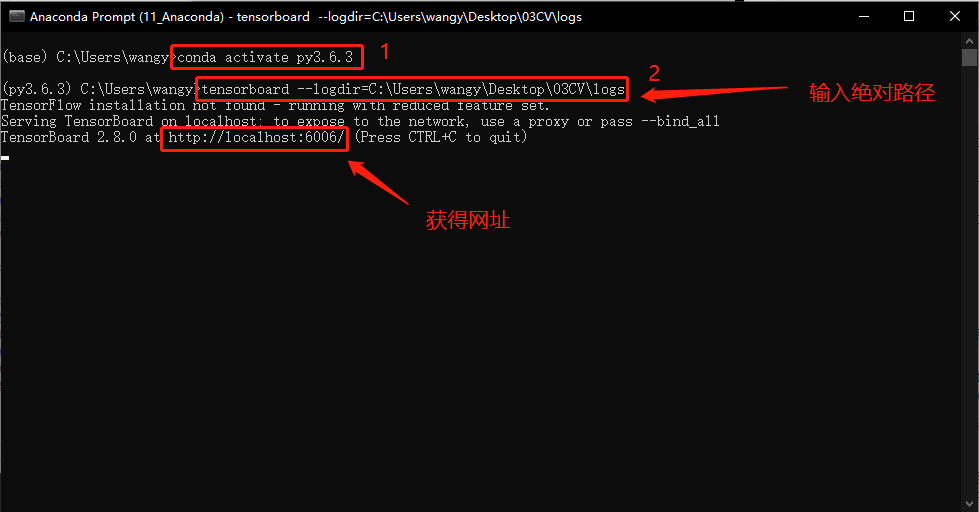

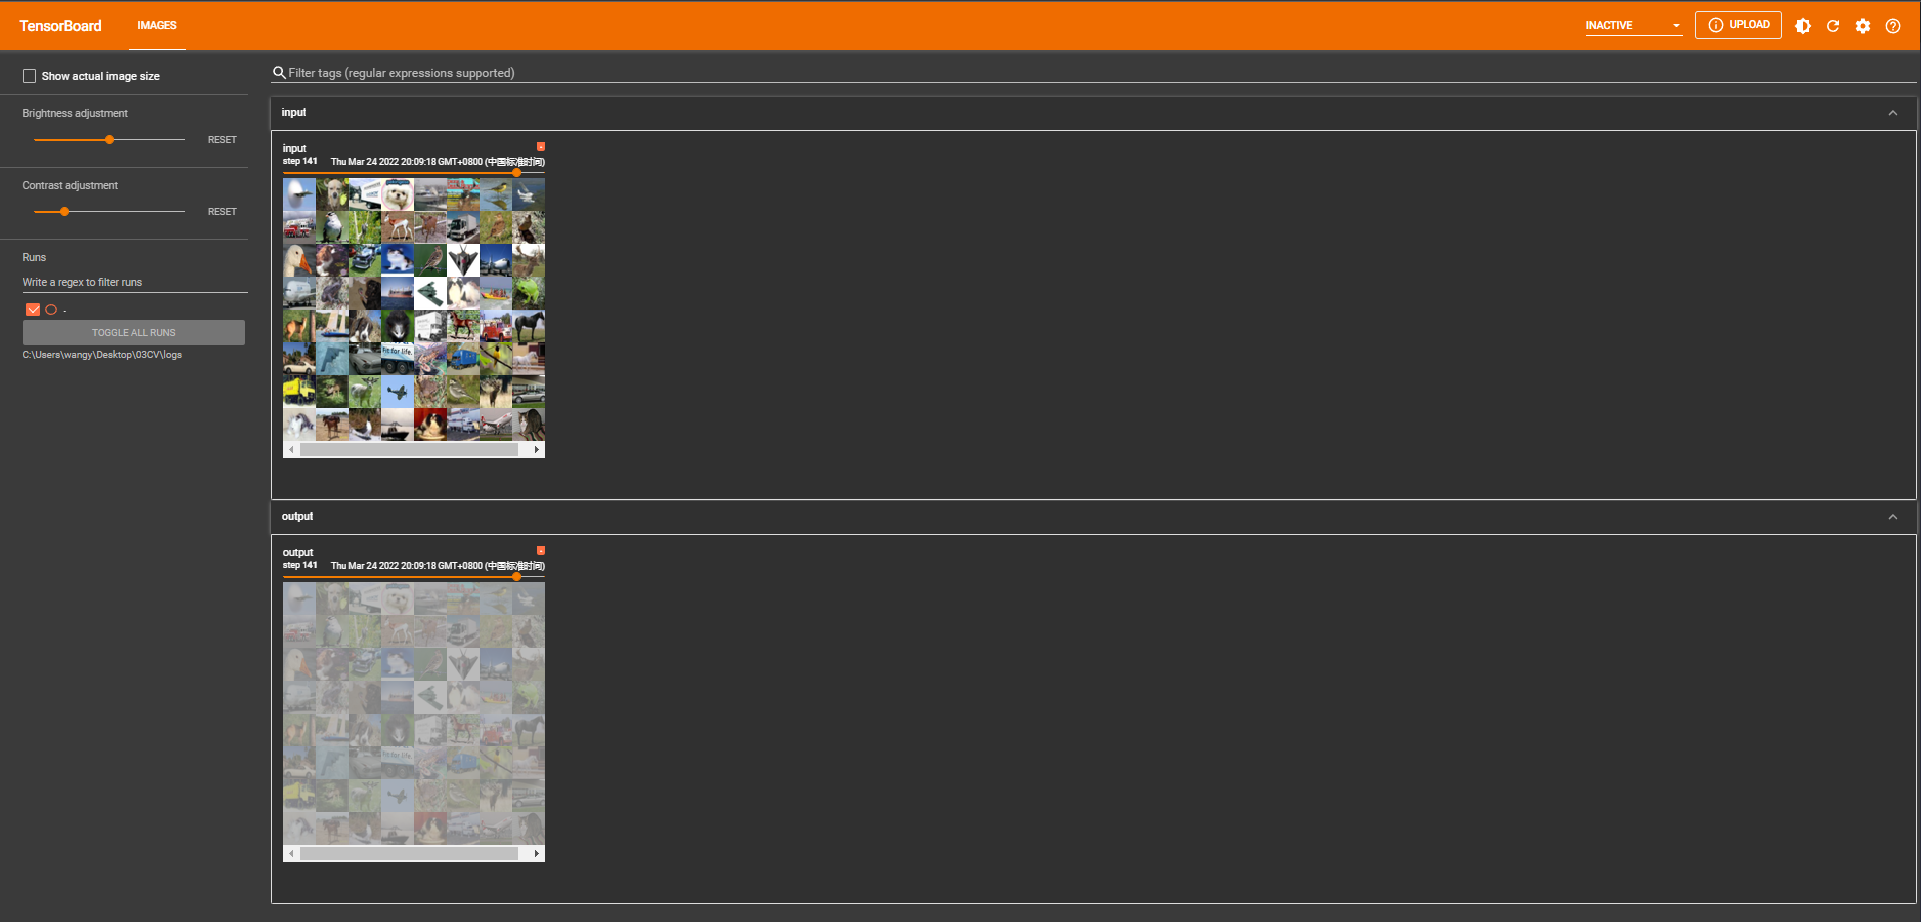